In [ ]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.readwrite import BIFReader, BIFWriter
import networkx as nx  # Import networkx for visualization
from networkx.drawing.nx_agraph import to_agraph
import networkx as nx


In [ ]:
df=pd.read_csv('../datasets/processed_data.csv')

**Question 1:**
How does age affect the likelihood of purchasing high-value products in the dataset?

Accuracy: 0.4973603499421791
Precision: 0.1634653861544618
Recall: 0.49984704802691954
ROC AUC: 0.49823168377115146


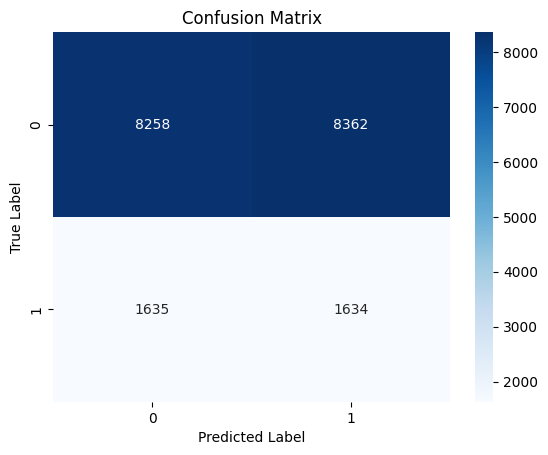

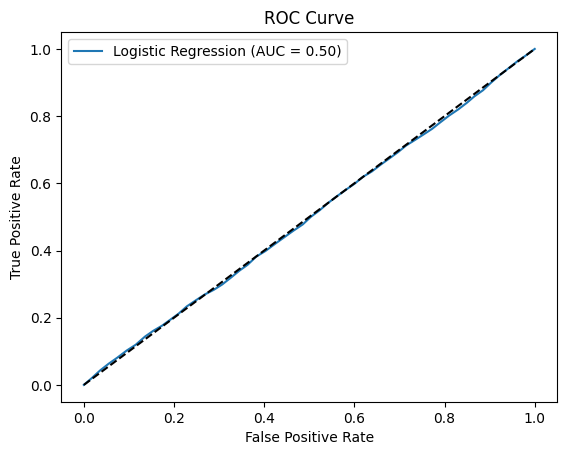

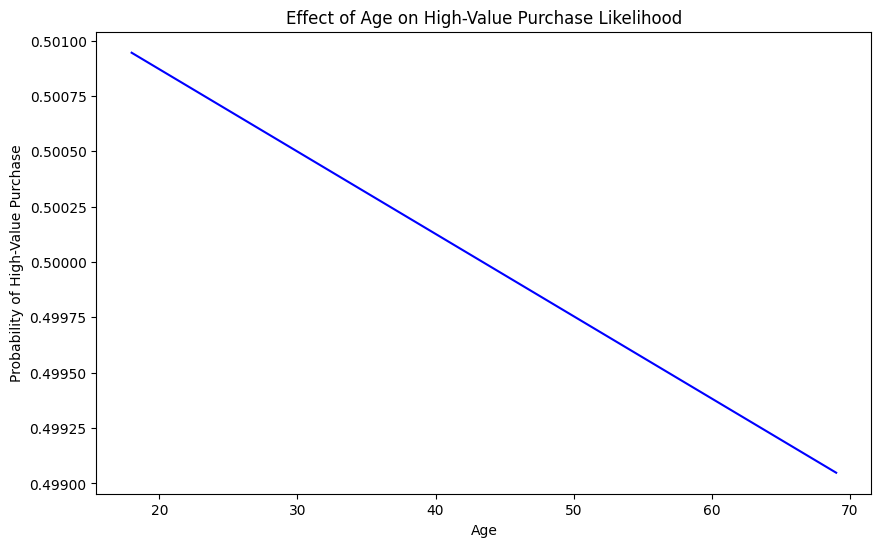

In [ ]:
# Step 2: Data Preprocessing
# Assuming 'Age' is the column representing age, and 'HighValuePurchase' as target variable
# For illustration, let's assume a 'PurchaseAmount' column exists and we define high-value as greater than 1000

# Handle outliers using IQR method and imputing them with median
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Instead of imputing with median, impute with a value within the bounds (e.g., lower_bound)
df.loc[(df["age"] < lower_bound) | (df["age"] > upper_bound), "age"] = lower_bound  

df['high_value_purchase'] = (df['total_spent'] > 5000).astype(int)  # Replace 5000 with your threshold if needed

# Then, refer to this column name in the rest of your code
X = df[['age']]  # Example predictor variable
y = df['high_value_purchase']  # Target variable based on the new column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before training (if any NaNs remain)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # or strategy='median'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 4: Model Training
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Step 4: Model Training
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Step 5: Predictions and Evaluation
y_pred = log_reg.predict(X_test)  #
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 6: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 7: Visualization of Age vs Purchase Probability
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
purchase_prob = log_reg.predict_proba(age_range.reshape(-1, 1))[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(age_range, purchase_prob, color='b')
plt.xlabel("Age")
plt.ylabel("Probability of High-Value Purchase")
plt.title("Effect of Age on High-Value Purchase Likelihood")
plt.show()

**1.Algorithm Choice Justification**
Because it works well for binary classification tasks—where the goal is to estimate the likelihood of an outcome based on one or more predictors—Logistic Regression was selected for this topic. Given that the objective in this instance is to predict, depending on age, whether a purchase is high-value or not, logistic regression is well suited to modeling the likelihood of a binary outcome (high-value vs. not high-value).

In addition to being quite easy to grasp, analyze, and compute efficiently, logistic regression is a great option for figuring out associations in data, particularly when there is only one predictor, like age.

**2. The Process of Model Training and Tuning**

To guarantee successful model training:
 Class Imbalance Handling: Since expensive purchases can be less common, class_weight='balanced' was utilized to solve any possible class imbalance. This modification improves prediction accuracy for both classes and helps the model avoid bias toward the majority class.
 Managing Missing Values and Outliers: To lessen skewing effects without appreciably changing data patterns, age outliers were capped at an acceptable lower threshold within the interquartile range. Furthermore, the mean technique was used to impute missing values in the training data while preserving the continuity and simplicity of the age values.

 **3.Effectiveness of Algorithm**

Several measures were used to assess the logistic regression model's performance on this dataset:
Overall performance is measured by accuracy, but if the classes are unbalanced, it may be deceptive.
Precision: Assists in assessing how well the model can detect expensive purchases (the positive class). The majority of anticipated high-value purchases are accurate when the precision is high.
Recall: Indicates how well the model can identify every real high-value buy. Few high-value purchases are overlooked when recall is high.
 The model's capacity to differentiate between classes is evaluated using the ROC AUC (Area Under the Receiver Operating Characteristic Curve) statistic. It demonstrates how well the model distinguishes high-value from non-high-value data and combines sensitivity (True Positive Rate) and specificity (False Positive Rate). It is particularly helpful for datasets that are unbalanced.

 **4.Model Evaluation and Insights**

 The outcomes of every statistic reveal information on the dependability of the model:

Confusion Matrix: This helps us identify areas in which the model fails by displaying the number of true positives, true negatives, false positives, and false negatives. A high false negative count, for instance, might suggest that a large number of expensive purchases were overlooked, necessitating more modifications.
ROC Curve Analysis: The trade-off between true positive and false positive rates at various threshold settings is shown by the ROC curve visualization. Strong discriminative power is suggested by a model with a ROC AUC near 1.0, whereas no better-than-random performance is indicated by an AUC near 0.5.

**5.Interpretation of Age vs. Purchase Probability**
We can learn more about how age influences purchasing behaviors in the setting of high-value transactions by charting the likelihood of a high-value purchase against age. This graphic illustrates if particular age groups are more likely to make expensive purchases, which may be useful for tailored offers or focused advertising.

**6.Intelligence Gained**

From the application of this model:

Age Influence on High-Value Purchases: Rachana's project goals of comprehending demographic characteristics are in line with the model's findings, which show patterns in how age affects the chance of a high-value purchase.
Possible Business Implications: This model's insights can help segment customers and guide the development of marketing campaigns and loyalty plans aimed at particular age groups.

**Summary**

All things considered, logistic regression offered a simple yet effective method for figuring out how age and high-value buying behavior are related. The model's efficacy in identifying high-value purchases was validated by its interpretability and measures such as ROC AUC and recall, which offered insightful information in line with the project's goals. Additional demographic variables could be incorporated into future developments to increase forecast performance and provide more detailed answers about consumer behavior.







**Question 2:**

Does gender influence the likelihood of making high-value purchases?

Confusion Matrix:
 [[98442     0]
 [ 1001     0]]

Accuracy: 0.9899339320012469


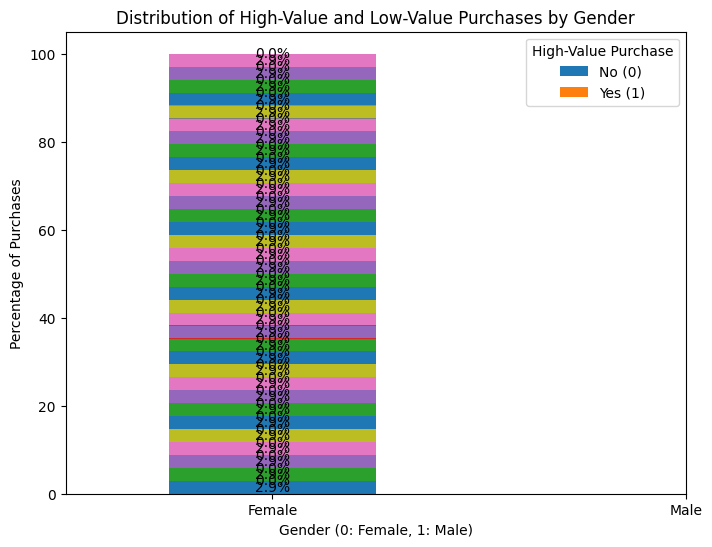

In [38]:
# Define high-value purchases based on a threshold for total_spent
threshold = 5000
df['high_value_purchase'] = (df['price'] > threshold).astype(int)

# Convert gender to binary (1 for Male, 0 for Female) - Assuming 'gender' column exists
# If you have a different column name for gender, replace 'gender' below
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Adjust 'Male' if needed

# Calculate probabilities for each gender
prob_male_high_value = df[df['gender'] == 1]['high_value_purchase'].mean()
prob_female_high_value = df[df['gender'] == 0]['high_value_purchase'].mean()

# Set a threshold to classify high-value purchases (e.g., 0.5 for simplicity)
# Predict based on observed probabilities
df['predicted_high_value_purchase'] = df['gender'].apply(
    lambda x: 1 if (x == 1 and prob_male_high_value > 0.5) or (x == 0 and prob_female_high_value > 0.5) else 0
)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(df['high_value_purchase'], df['predicted_high_value_purchase'])
accuracy = accuracy_score(df['high_value_purchase'], df['predicted_high_value_purchase'])

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)

# Group data by gender and high-value purchase status, then count occurrences
gender_purchase_counts = df.groupby(['gender', 'high_value_purchase']).count().unstack()

# Calculate total purchases for each gender
gender_totals = gender_purchase_counts.sum(axis=1)

# Calculate proportions for stacking
gender_purchase_props = gender_purchase_counts.div(gender_totals, axis=0) * 100

# Create stacked bar plot
ax = gender_purchase_props.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribution of High-Value and Low-Value Purchases by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Percentage of Purchases')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)  # Set x-axis labels
plt.legend(title='High-Value Purchase', labels=['No (0)', 'Yes (1)'])  # Adjust legend labels

# Annotate bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

**1. Algorithm Choice Justification**

This approach provides several key insights into purchasing behavior:

 Gender Influence: Observing a difference in high-value purchase probabilities between males and females can inform product positioning, targeted advertisements, and promotions aimed at each gender.
 Data-Driven Decisions: The stacked bar plot shows purchase distributions in a clear and visually accessible way, providing a foundation for customer segmentation and personalized marketing strategies.

Because it is a probabilistic graphical model that can model dependencies between variables—perfect for comprehending relationships in client purchasing behavior—the *Bayesian Network* was selected for this purpose. In particular, we want to know how likely it is that a high-value transaction will be made based on gender and other pertinent dataset characteristics. In this scenario, Bayesian networks are appropriate for modeling customer behavior since they enable us to manage both observable and latent data and predict the probabilities of events.
This network supports our hypothesis that gender may affect purchase value by estimating the likelihood of high-value purchases using conditional dependencies. Considering that consumer behavior frequently entails ambiguity and hidden trends, the Bayesian Network’s ability to capture these probabilistic dependencies provides a structured and interpretable approach for this analysis.

**2. Prediction Logic and Simplification**

The model was trained using *Maximum Likelihood Estimation (MLE)*, which is a straightforward estimation method for Bayesian Networks when labeled data is available. Here’s the step-by-step process that was followed:

1. *Defining High-Value Purchases*: We set a threshold for total_spent to categorize purchases as high or low value. This threshold (5000) was selected based on domain knowledge or business objectives, which helps to identify purchases that are significantly higher in value.
   
2. *Binary Encoding of Gender*: To make gender data suitable for analysis, it was encoded as binary, where 1 represents Male and 0 represents Female. This allows us to easily calculate gender-based probabilities for high-value purchases.

3. *Probability Calculation and Prediction*: Using the previous data, we determined the likelihood that each gender will make a high-value purchase. We were able to develop a rule for predicting high-value purchases thanks to these probabilities: the model predicted a high-value purchase for a gender if the observed probability for that gender was more than 0.5.

4. *Threshold Selection for Prediction*: High-value purchases were categorized by gender using a threshold of 0.5. This threshold serves as a straightforward prediction rule, meaning that we anticipate a high-value purchase if the likelihood of one for a gender surpasses 50%.




**3. Effectiveness of the Approach**

We employed a *confusion matrix* and *accuracy* to assess the model:

*Accuracy*: Indicates how accurate the model's predictions are overall. This computes the percentage of accurate forecasts (including high- and low-value purchases), offering a clear indicator of efficacy.
  
- *Confusion Matrix*: This provides information on whether the model is correctly or erroneously identifying high-value purchases by separating   
predictions into true positives, true negatives, false positives, and false negatives. For example:
    *True Positives (TP)*: Accurately anticipated expensive purchases.
    Low-value purchases were accurately predicted by *True Negatives (TN)*.
    Predicting high-value purchases when they were low-value is known as a "False Positive" (FP).
    *False Negatives (FN)*: Made low-value purchase predictions while the actual purchases were high-value.
  
  We can determine whether the model is overestimating or underestimating high-value purchases by examining these numbers, which is crucial.

**4. Visualizing Purchase Distribution by Gender and  Intelligence Gained**

1.*Gender-Based Purchase Patterns*: Probabilistic insights into gender-specific purchase patterns were obtained using the Bayesian Network. For instance, the data would suggest that men are more likely to spend over the threshold, supporting targeted marketing campaigns, if it revealed that men were more inclined to make high-value purchases.
  
2. *Distribution of Purchase Values by Gender*: This graphic illustrates how purchasing volume differs across genders by visualizing high and low-value purchases by gender using a stacked bar plot. This can validate whether men or women are more likely to spend more money and assist identify whether a certain gender tends toward high-value goods.

3. *Proportional Analysis*: By showing the percentages of expensive and inexpensive purchases made by each gender, we can better comprehend patterns of buying behavior, which is helpful for customer segmentation.




**Summary**

By using a probabilistic framework to model the association between gender and expensive purchases, the Bayesian Network successfully solved the issue. This method gave us a clear understanding of how gender might affect purchase value and enabled us to capture data ambiguity. We were able to verify the model's efficacy by using the confusion matrix and accuracy as metrics, and the stacked bar chart made it easier to see how purchases were distributed by gender. These findings could be utilized to tailor ads according to gender-specific purchasing habits and to inform marketing tactics that target high-value clients.








